# About


This notebooks will analyze the  computation time in function of the block size, which is the criterion for which `rtrgsyl` stops the recursion and uses another solver to solve the small system. We will use scipy's solver. 

# Benchmark

## Imports & Utils

In [1]:
from benchmark_utils import benchmark
from utils import solve_sylvester_scipy
from recursive import rtrgsyl

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Format the results of the benchmark() function
def format_results_bs(res_dic):
    df = pd.DataFrame(res_dic)
    df.time = df.time.apply(np.array)
    df['time_schur'] = df.time.apply(lambda lst: [tpl[0] for tpl in lst])
    df['time_solve'] = df.time.apply(lambda lst: [tpl[1] for tpl in lst])
    df['time_back'] = df.time.apply(lambda lst: [tpl[2] for tpl in lst])
    df.drop(columns='time', inplace=True)

    for e in df.columns:
        if e.startswith('time_'):
            df[f'{e}_mean'] = df[e].apply(np.mean)
            df[f'{e}_std'] = df[e].apply(np.std)
    
    df['m'] = df.dim.apply(lambda e: e[0])
    df['n'] = df.dim.apply(lambda e: e[1])
    
    return df

## Vary block size

In [4]:
blks_grid = 2 ** np.arange(2, 10)
blks_grid

array([  4,   8,  16,  32,  64, 128, 256, 512])

In [5]:
res = benchmark(
    solve_fun=rtrgsyl,
    vary_param=('blks', blks_grid),
    log_context={'algo': 'rtrgsyl', 'std_solver': 'syl_scipy'},
    bartel_stewart=True,
    dim=(1000, 1000),
    std_solver=solve_sylvester_scipy
)

blks=4 5 runs
blks=8 5 runs
blks=16 5 runs
blks=32 5 runs
blks=64 5 runs
blks=128 5 runs
blks=256 5 runs
blks=512 5 runs


In [6]:
df = format_results_bs(res)
df.head(2)

,dim,std_solver,blks,algo,time_schur,time_solve,time_back,time_schur_mean,time_schur_std,time_solve_mean,time_solve_std,time_back_mean,time_back_std,m,n
0,"(1000, 1000)",syl_scipy,4,rtrgsyl,"[1.5868542194366455, 1.441138505935669, 1.4718...","[4.775654554367065, 5.0366129875183105, 4.7833...","[0.018639087677001953, 0.01759028434753418, 0....",1.472846,0.068132,4.794717,0.141195,0.030204,0.023089,1000,1000
1,"(1000, 1000)",syl_scipy,8,rtrgsyl,"[1.394913673400879, 1.4651854038238525, 1.3487...","[1.796738624572754, 1.8093287944793701, 1.8114...","[0.018682003021240234, 0.018094301223754883, 0...",1.405711,0.037247,1.836198,0.041364,0.018306,0.000496,1000,1000


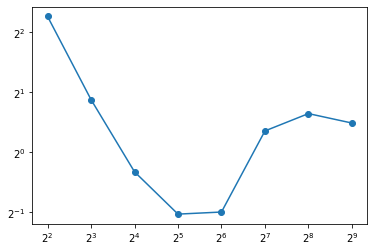

In [7]:
plt.loglog(df.blks, df.time_solve_mean, '-o', base=2)

### Sanity check: rectangular matrices

In [9]:
res_wide = benchmark(
    solve_fun=rtrgsyl,
    vary_param=('blks', blks_grid),
    log_context={'algo': 'rtrgsyl', 'std_solver': 'syl_scipy'},
    bartel_stewart=True,
    dim=(1000, 2000),
    std_solver=solve_sylvester_scipy
)

blks=4 5 runs
blks=8 5 runs
blks=16 5 runs
blks=32 5 runs
blks=64 5 runs
blks=128 5 runs
blks=256 5 runs
blks=512 5 runs


In [10]:
df_wide = format_results_bs(res_wide)
df_wide.head(2)

,dim,std_solver,blks,algo,time_schur,time_solve,time_back,time_schur_mean,time_schur_std,time_solve_mean,time_solve_std,time_back_mean,time_back_std,m,n
0,"(1000, 2000)",syl_scipy,4,rtrgsyl,"[4.302501201629639, 4.795268297195435, 4.91601...","[9.727572202682495, 9.205167293548584, 9.01951...","[0.04959416389465332, 0.08712315559387207, 0.0...",4.922669,0.502359,9.333014,0.260397,0.069992,0.018452,1000,2000
1,"(1000, 2000)",syl_scipy,8,rtrgsyl,"[5.002025604248047, 4.373266220092773, 4.39701...","[3.2305185794830322, 3.840277910232544, 3.4738...","[0.05466938018798828, 0.07143402099609375, 0.0...",4.559351,0.246723,3.446779,0.212087,0.062469,0.009959,1000,2000


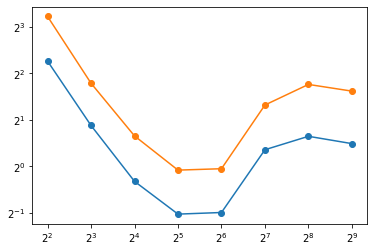

In [11]:
plt.loglog(df.blks, df.time_solve_mean, '-o', base=2)
plt.loglog(df_wide.blks, df_wide.time_solve_mean, '-o', base=2)

## Save results

In [13]:
import json

res_dump = res + res_wide
for e in res_dump:
    e['dim'] = (int(e['dim'][0]), int(e['dim'][1]))
    e['blks'] = int(e['blks'])

with open('res/benchmark_blks.json', 'w') as f:
    json.dump(res_dump, f)

# Generate plots for report

In [14]:
from ipypublish import nb_setup
plt = nb_setup.setup_matplotlib()
import seaborn as sns
sns.set(style='whitegrid')

/home/maousi/miniconda3/envs/ada/lib/python3.9/site-packages/ipypublish/scripts/nb_setup.py:226: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams[key] = val
/home/maousi/miniconda3/envs/ada/lib/python3.9/site-packages/ipypublish/scripts/nb_setup.py:226: MatplotlibDeprecationWarning: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  mpl.rcParams[key] = val
/home/maousi/miniconda3/envs/ada/lib/python3.9/site-packages/ipypublish/scripts/nb_setup.py:226: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  mpl.rcParams[key] = val
/home/maousi/miniconda3/envs/ada/lib/python3.9/site-packages/ipypublish/scripts/nb_setup.py:226: MatplotlibDeprecati

In [15]:
def plot_multiple_runs(df, x, y, ystd, label, base=2):
    plt.semilogx(df[x], df[y], '-o', label=label, base=base)
    plt.fill_between(df[x], df[y] - df[ystd], df[y] + df[ystd], alpha=.4)

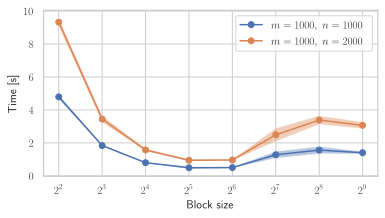

In [16]:
plt.figure(figsize=(6, 3))

plot_multiple_runs(df, 'blks', 'time_solve_mean', 'time_solve_std', label='$m=1000,\; n=1000$')
plot_multiple_runs(df_wide, 'blks', 'time_solve_mean', 'time_solve_std', label='$m=1000,\; n=2000$')

plt.xlabel('Block size'); plt.ylabel('Time [s]')
plt.legend()
plt.savefig('res/benchmark_blks.pdf', bbox_inches='tight')